In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif

In [2]:
# import dataset
data = pd.read_csv('dataset_v3.csv')
data.head() 

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
# memisahkan fitur dan label
X = data.drop('Result', axis=1)
y = data['Result']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
#Remove constant, quasi constant
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [6]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [7]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [8]:
#Remove duplicate features
X_train_T.duplicated().sum()

0

In [9]:
duplicated_features = X_train_T.duplicated()
features_to_keep = [not index for index in duplicated_features]

In [10]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [11]:
# Menghitung Information Gain
mi = mutual_info_classif(X_train_unique, y_train)

In [12]:
mi = pd.Series(mi)
mi.index = X_train.columns

In [13]:
print("Information Gain pada tiap fitur:")
mi

Information Gain pada tiap fitur:


having_IP_Address              0.016674
URL_Length                     0.005047
Shortining_Service             0.000000
having_At_Symbol               0.002065
double_slash_redirecting       0.003750
Prefix_Suffix                  0.090748
having_Sub_Domain              0.077845
SSLfinal_State                 0.349132
Domain_registeration_length    0.023315
Favicon                        0.005325
port                           0.002051
HTTPS_token                    0.000000
Request_URL                    0.034087
URL_of_Anchor                  0.336133
Links_in_tags                  0.025797
SFH                            0.027081
Submitting_to_email            0.000000
Abnormal_URL                   0.004914
Redirect                       0.004789
on_mouseover                   0.003214
RightClick                     0.008085
popUpWidnow                    0.003353
Iframe                         0.005869
age_of_domain                  0.004450
DNSRecord                      0.000000


In [14]:
mi.index = X_train_unique.columns
print("Information Gain pada tiap fitur (Konversi label ke angka):")
mi

Information Gain pada tiap fitur (Konversi label ke angka):


0     0.016674
1     0.005047
2     0.000000
3     0.002065
4     0.003750
5     0.090748
6     0.077845
7     0.349132
8     0.023315
9     0.005325
10    0.002051
11    0.000000
12    0.034087
13    0.336133
14    0.025797
15    0.027081
16    0.000000
17    0.004914
18    0.004789
19    0.003214
20    0.008085
21    0.003353
22    0.005869
23    0.004450
24    0.000000
25    0.083466
26    0.007801
27    0.008808
28    0.000000
29    0.007905
dtype: float64

In [15]:
mi.sort_values(ascending=False, inplace = True)

<AxesSubplot:>

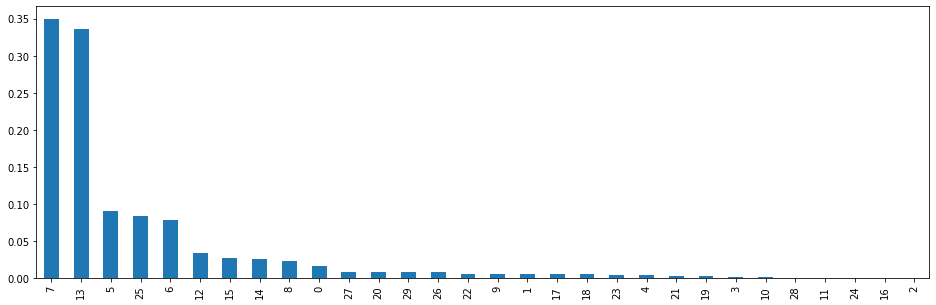

In [16]:
mi.plot.bar(figsize = (16, 5))

In [17]:
# Memilih fitur berdasarkan nilai tertinggi
sel = SelectPercentile(mutual_info_classif, percentile=80).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 13, 14, 15, 17, 19, 20,
            23, 24, 25, 26, 27, 28, 29],
           dtype='int64')

In [18]:
X_train_mi = sel.transform(X_train_unique)
X_test_mi = sel.transform(X_test_unique)


In [19]:
# Classifier DecisionTree
def run_dt(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(
        criterion='gini',
        splitter='best',
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features=None,
        random_state=None,
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        min_impurity_split=0,
        class_weight=None,
        presort='deprecated',
        ccp_alpha=0.0
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Algoritma yang digunakan: Decision Tree (CART)')
    print('Jumlah data: ', len(X))
    print('Jumlah data training: ', len(X_train))
    print('Jumlah data testing: ', len(X_test))
    print('Accuracy on test set: ', "{:.3f}".format(accuracy_score(y_test, y_pred)*100),"%")
    print('Confusion Matrix:')
    test_conf = confusion_matrix(y_test, y_pred)
    print(test_conf)
    print('Classification Report:')
    print(classification_report(y_test, y_pred, digits=5))

In [20]:
# Classifier KNN
def run_knn(X_train, X_test, y_train, y_test):
    clf = KNeighborsClassifier(
        n_neighbors=5,
        weights='uniform',
        algorithm='auto',
        leaf_size=30,
        p=2,
        metric='minkowski',
        metric_params=None,
        n_jobs=None
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Algoritma yang digunakan: K-Nearest Neighbor')
    print('Jumlah data: ', len(X))
    print('Jumlah data training: ', len(X_train))
    print('Jumlah data testing: ', len(X_test))
    print('Accuracy on test set: ', "{:.3f}".format(accuracy_score(y_test, y_pred)*100),"%")
    print('Confusion Matrix:')
    test_conf = confusion_matrix(y_test, y_pred)
    print(test_conf)
    print('Classification Report:')
    print(classification_report(y_test, y_pred, digits=5))

In [21]:
# Classifier NaiveBayes
def run_nb(X_train, X_test, y_train, y_test):
    clf = BernoulliNB(
        alpha=1.0,
        binarize=0.0,
        fit_prior=True,
        class_prior=None
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Algoritma yang digunakan: Naive Bayes')
    print('Jumlah data: ', len(X))
    print('Jumlah data training: ', len(X_train))
    print('Jumlah data testing: ', len(X_test))
    print('Accuracy on test set: ', "{:.3f}".format(accuracy_score(y_test, y_pred)*100),"%")
    print('Confusion Matrix:')
    test_conf = confusion_matrix(y_test, y_pred)
    print(test_conf)
    print('Classification Report:')
    print(classification_report(y_test, y_pred, digits=5))

In [22]:
# DecisionTree 
print(' ------- Tanpa seleksi fitur -------')
run_dt(X_train, X_test, y_train, y_test)
print(' ')
print(' ------- Dengan seleksi fitur ------- ')
run_dt(X_train_mi, X_test_mi, y_train, y_test)

 ------- Tanpa seleksi fitur -------
Algoritma yang digunakan: Decision Tree (CART)
Jumlah data:  11055
Jumlah data training:  8844
Jumlah data testing:  2211
Accuracy on test set:  96.563 %
Confusion Matrix:
[[ 943   40]
 [  36 1192]]
Classification Report:
              precision    recall  f1-score   support

          -1    0.96323   0.95931   0.96126       983
           1    0.96753   0.97068   0.96911      1228

    accuracy                        0.96563      2211
   macro avg    0.96538   0.96500   0.96518      2211
weighted avg    0.96562   0.96563   0.96562      2211

 
 ------- Dengan seleksi fitur ------- 
Algoritma yang digunakan: Decision Tree (CART)
Jumlah data:  11055
Jumlah data training:  8844
Jumlah data testing:  2211
Accuracy on test set:  97.015 %
Confusion Matrix:
[[ 950   33]
 [  33 1195]]
Classification Report:
              precision    recall  f1-score   support

          -1    0.96643   0.96643   0.96643       983
           1    0.97313   0.97313   0.9731

In [23]:
# KNearest Neighbor
print(' ------- Tanpa seleksi fitur --------')
run_knn(X_train, X_test, y_train, y_test)
print(' ')
print(' ------- Dengan seleksi fitur --------')
run_knn(X_train_mi, X_test_mi, y_train, y_test)

 ------- Tanpa seleksi fitur --------
Algoritma yang digunakan: K-Nearest Neighbor
Jumlah data:  11055
Jumlah data training:  8844
Jumlah data testing:  2211
Accuracy on test set:  95.070 %
Confusion Matrix:
[[ 930   53]
 [  56 1172]]
Classification Report:
              precision    recall  f1-score   support

          -1    0.94320   0.94608   0.94464       983
           1    0.95673   0.95440   0.95556      1228

    accuracy                        0.95070      2211
   macro avg    0.94997   0.95024   0.95010      2211
weighted avg    0.95072   0.95070   0.95071      2211

 
 ------- Dengan seleksi fitur --------
Algoritma yang digunakan: K-Nearest Neighbor
Jumlah data:  11055
Jumlah data training:  8844
Jumlah data testing:  2211
Accuracy on test set:  94.844 %
Confusion Matrix:
[[ 926   57]
 [  57 1171]]
Classification Report:
              precision    recall  f1-score   support

          -1    0.94201   0.94201   0.94201       983
           1    0.95358   0.95358   0.95358  

In [24]:
# Naive Bayes 
print(' ------- Tanpa seleksi fitur --------')
run_nb(X_train, X_test, y_train, y_test)
print(' ')
print(' ------- Dengan seleksi fitur --------')
run_nb(X_train_mi, X_test_mi, y_train, y_test)

 ------- Tanpa seleksi fitur --------
Algoritma yang digunakan: Naive Bayes
Jumlah data:  11055
Jumlah data training:  8844
Jumlah data testing:  2211
Accuracy on test set:  90.140 %
Confusion Matrix:
[[ 887   96]
 [ 122 1106]]
Classification Report:
              precision    recall  f1-score   support

          -1    0.87909   0.90234   0.89056       983
           1    0.92013   0.90065   0.91029      1228

    accuracy                        0.90140      2211
   macro avg    0.89961   0.90150   0.90043      2211
weighted avg    0.90188   0.90140   0.90152      2211

 
 ------- Dengan seleksi fitur --------
Algoritma yang digunakan: Naive Bayes
Jumlah data:  11055
Jumlah data training:  8844
Jumlah data testing:  2211
Accuracy on test set:  90.095 %
Confusion Matrix:
[[ 887   96]
 [ 123 1105]]
Classification Report:
              precision    recall  f1-score   support

          -1    0.87822   0.90234   0.89012       983
           1    0.92007   0.89984   0.90984      1228

    